# Project AluraCare
### Apply Classification Algorithm
- Detect types of fraud
- Apply Classification Algorithms
- Select Features
- Different reduction methods of Features

#### 1. Read and Analyse data

In [730]:
import pandas as pd
import numpy as np

data = pd.read_csv("data-set/exames.csv")
data.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [731]:
data.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

In [732]:
from sklearn.model_selection import train_test_split
from numpy import random

X = data.drop(columns=["id", "diagnostico","exame_33"])
y = data["diagnostico"]

seed=5
random.seed(seed)

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = seed, test_size = 0.30, stratify=y)


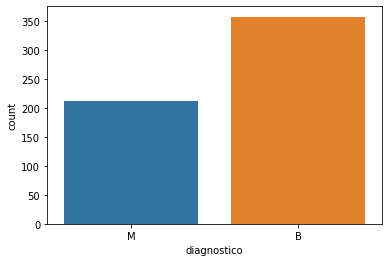

In [733]:
import seaborn as sns
%matplotlib inline

ax = sns.countplot(x='diagnostico', data=data)

#### 2. Aplly RandomForest Classification

In [734]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=seed)
rfc.fit(x_train, y_train)
print(rfc.score(x_test, y_test)*100)

93.56725146198829


In [783]:
#baseline using Dummy Classifier
from sklearn.dummy import DummyClassifier

seed=5
random.seed(seed)

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(x_train, y_train)
dummy_clf.score(x_test, y_test)*100

62.57309941520468

In [736]:
X.keys()

Index(['exame_1', 'exame_2', 'exame_3', 'exame_4', 'exame_5', 'exame_6',
       'exame_7', 'exame_8', 'exame_9', 'exame_10', 'exame_11', 'exame_12',
       'exame_13', 'exame_14', 'exame_15', 'exame_16', 'exame_17', 'exame_18',
       'exame_19', 'exame_20', 'exame_21', 'exame_22', 'exame_23', 'exame_24',
       'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_29', 'exame_30',
       'exame_31', 'exame_32'],
      dtype='object')

In [784]:
#normalized data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_normalized = scaler.transform(X)
X_normalized = pd.DataFrame(data=X_normalized, columns=X.keys())

In [738]:
#melt data
data_plot = pd.concat([y,X_normalized], axis=1)
data_plot = pd.melt(data_plot, id_vars="diagnostico", var_name="exams", value_name="values")
data_plot.head()


,diagnostico,exams,values
0,M,exame_1,1.097064
1,M,exame_1,1.829821
2,M,exame_1,1.579888
3,M,exame_1,-0.768909
4,M,exame_1,1.750297


#### 3. Identify and Reduce Features

<AxesSubplot: xlabel='exams', ylabel='values'>

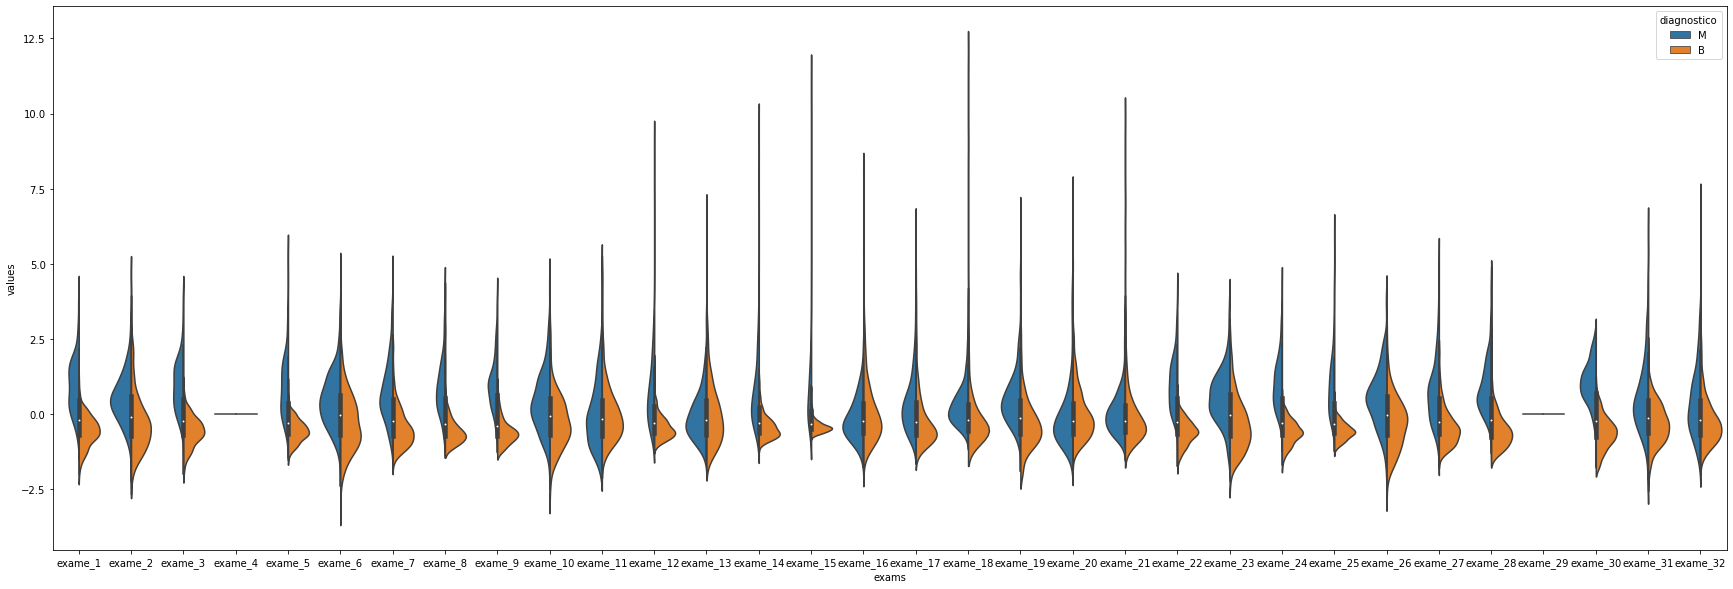

In [739]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30,10))

sns.violinplot(x="exams", y="values", hue="diagnostico", data=data_plot, split=True)

<AxesSubplot: xlabel='exams', ylabel='values'>

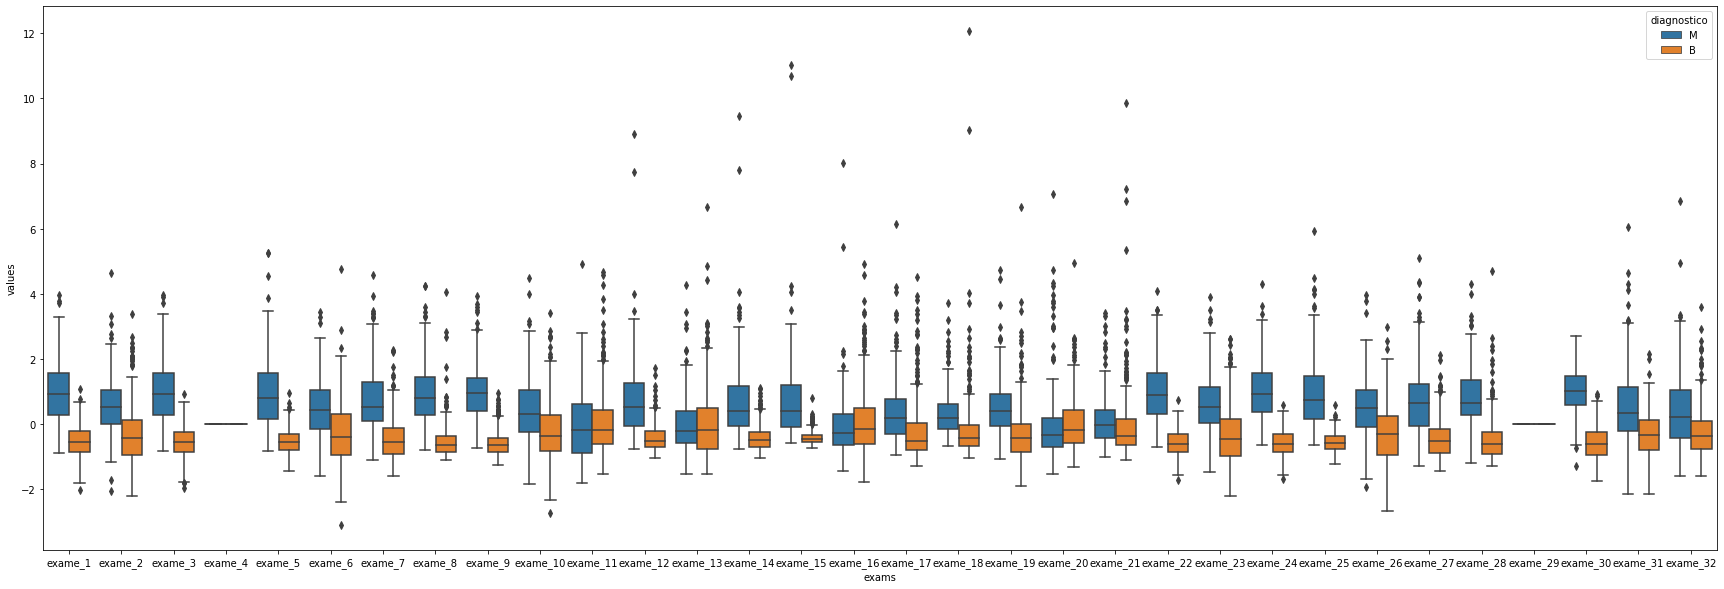

In [740]:
plt.figure(figsize=(30,10))
sns.boxplot(x="exams", y="values", hue="diagnostico", data=data_plot)

In [741]:
X_normalized_v2 = X_normalized.drop(columns=["exame_4","exame_29"])

In [742]:
def classify(values):
    seed=5
    random.seed(seed)

    x_train, x_test, y_train, y_test = train_test_split(values, y, random_state = seed, test_size = 0.30, stratify=y)
    
    rfc = RandomForestClassifier(n_estimators=100, random_state=seed)
    rfc.fit(x_train, y_train)
    print(rfc.score(x_test, y_test)*100)

In [743]:
classify(X_normalized_v2)

93.56725146198829


#### 4. Reduce Features Manually - Correlation Matrix

<AxesSubplot: >

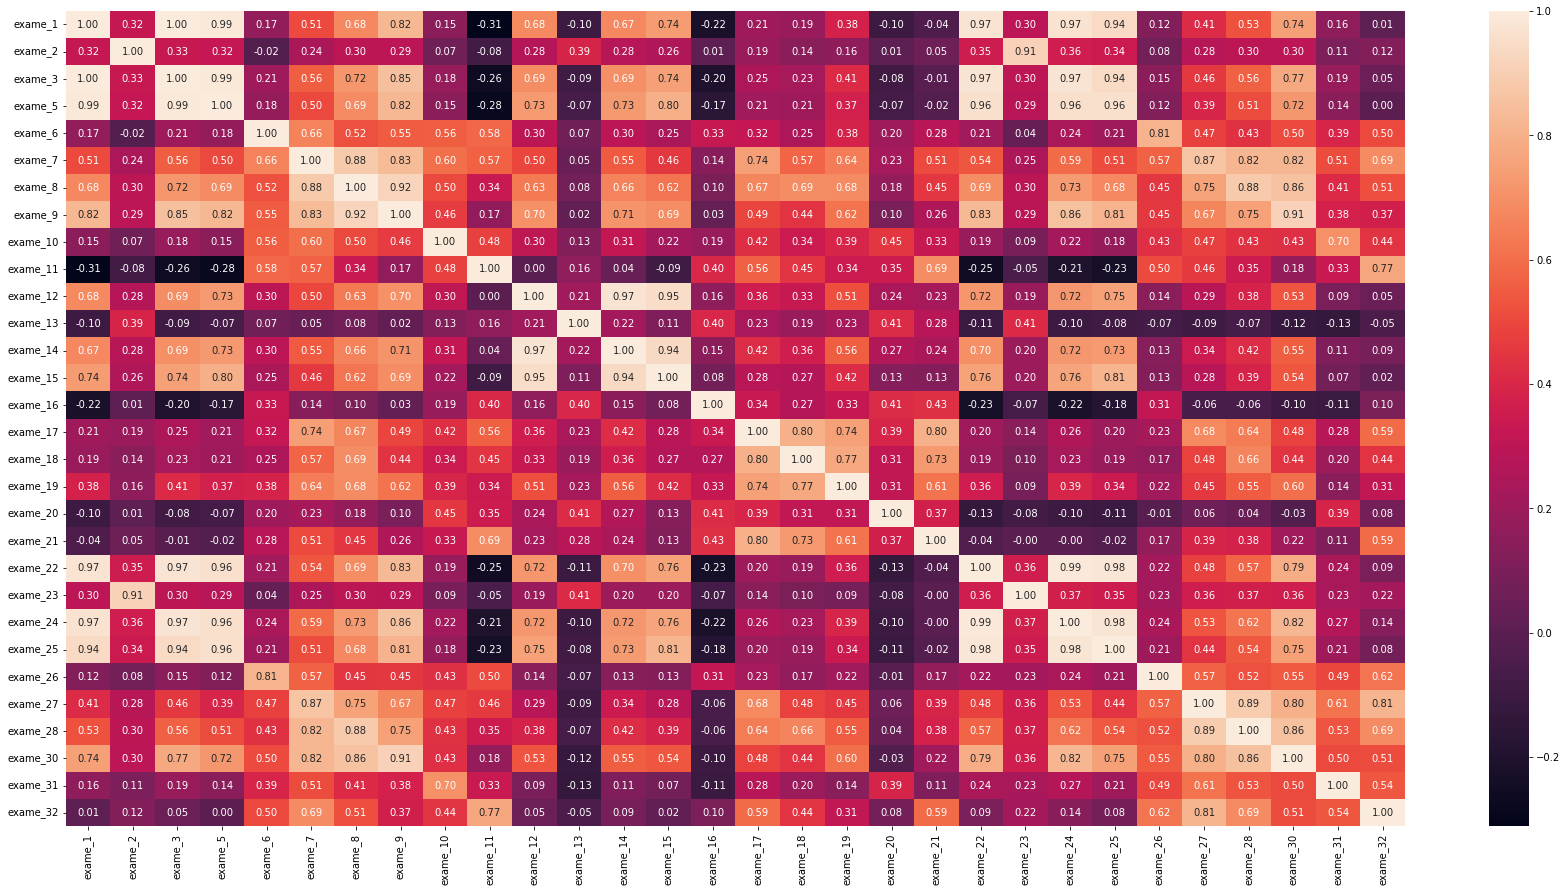

In [744]:
correlation_matrix = X_normalized_v2.corr()

plt.figure(figsize=(30,15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")

In [745]:
correlation_matrix_v1 = correlation_matrix[correlation_matrix>0.99]
correlation_matrix_v1

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [746]:
correlation_matrix_v2 = correlation_matrix_v1.sum()
correlation_matrix_v2

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [747]:
correlation_var = correlation_matrix_v2[correlation_matrix_v2>1]
correlation_var

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [748]:
X_normalized_v3 = X_normalized_v2.drop(columns=correlation_var.keys())
X_normalized_v3.head()

,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,...,exame_20,exame_21,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,...,1.148757,0.907083,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,...,-0.805450,-0.099444,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,...,0.237036,0.293559,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,...,4.732680,2.047511,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,...,-0.361092,0.499328,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [749]:
classify(X_normalized_v3)

94.73684210526315


In [750]:
X_normalized_v4 = X_normalized_v2.drop(columns=["exame_3","exame_24"])

In [751]:
classify(X_normalized_v4)

93.56725146198829


#### 5. Reduce Features Automatically - SelectKBest

In [752]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

kbest_selected = SelectKBest(chi2,k=5)

In [753]:
X_v3 = X.drop(columns=["exame_3","exame_4","exame_24","exame_29"])
X_v3.head()

,exame_1,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,...,exame_21,exame_22,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,17.99,10.38,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,...,0.006193,25.38,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,...,0.003532,24.99,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,...,0.004571,23.57,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,...,0.009208,14.91,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,...,0.005115,22.54,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [754]:
seed=5
random.seed(seed)

x_train, x_test, y_train, y_test = train_test_split(X_v3, y, random_state = seed, stratify=y, test_size = 0.30)

kbest_selected.fit(x_train,y_train)
kbest_train = kbest_selected.transform(x_train)
kbest_test = kbest_selected.transform(x_test)

In [755]:
rfc = RandomForestClassifier(n_estimators=100, random_state=seed)
rfc.fit(kbest_train, y_train)
print(rfc.score(kbest_test, y_test)*100)

86.54970760233918


In [756]:
from sklearn.metrics import confusion_matrix

y_pred = rfc.predict(kbest_test)

conf_matrix = confusion_matrix(y_test, y_pred)

[Text(0.5, 15.0, 'Predict'), Text(33.0, 0.5, 'Real')]

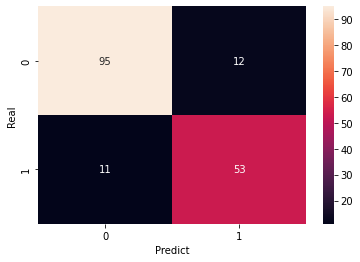

In [757]:
sns.heatmap(conf_matrix, annot=True, fmt="d").set(xlabel = "Predict", ylabel = "Real")

#### 6. Reduce Features Automatically - RFE

In [758]:
from sklearn.feature_selection import RFE

seed=5
random.seed(seed)

x_train, x_test, y_train, y_test = train_test_split(X_v3, y, random_state = seed, stratify=y, test_size = 0.30)

classify = RandomForestClassifier(n_estimators=100, random_state=seed)
classify.fit(x_train, y_train)

selection_rfe = RFE(estimator=classify, n_features_to_select=5, step=1)
selection_rfe.fit(x_train,y_train)
train_rfe = selection_rfe.transform(x_train)
test_rfe  = selection_rfe.transform(x_test)

classify.fit(train_rfe, y_train)
print(classify.score(test_rfe, y_test)*100)

92.39766081871345


[Text(0.5, 15.0, 'Predict'), Text(33.0, 0.5, 'Real')]

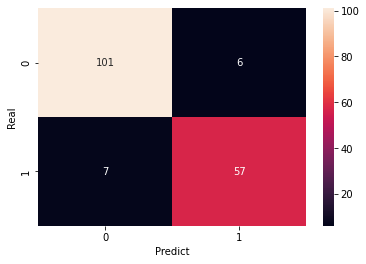

In [759]:
y_pred = classify.predict(test_rfe)

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d").set(xlabel = "Predict", ylabel = "Real")

In [760]:
selection_rfe.n_features_

5

In [761]:
selection_rfe.support_

array([False, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False, False,  True, False,
       False])

In [762]:
x_train.columns[selection_rfe.support_]

Index(['exame_5', 'exame_9', 'exame_22', 'exame_25', 'exame_30'], dtype='object')

#### 5. Reduce Features Automatically - RFECV

In [763]:
from sklearn.feature_selection import RFECV

seed=5
random.seed(seed)

x_train, x_test, y_train, y_test = train_test_split(X_v3, y, random_state = seed, stratify=y, test_size = 0.30)

classify = RandomForestClassifier(n_estimators=100, random_state=seed)
classify.fit(x_train, y_train)
rfecv = RFECV(estimator=classify, cv=5, step=1, scoring="accuracy")
rfecv.fit(x_train,y_train)
train_rfecv = rfecv.transform(x_train)
test_rfecv  = rfecv.transform(x_test)

classify.fit(train_rfecv, y_train)
print(classify.score(test_rfecv, y_test)*100)

94.15204678362574


[Text(0.5, 15.0, 'Predict'), Text(33.0, 0.5, 'Real')]

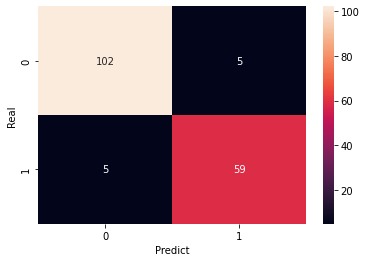

In [764]:
y_pred = classify.predict(test_rfecv)

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d").set(xlabel = "Predict", ylabel = "Real")

In [765]:
rfecv.n_features_

19

In [766]:
x_train.columns[rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_7', 'exame_8', 'exame_9',
       'exame_12', 'exame_14', 'exame_15', 'exame_18', 'exame_22', 'exame_23',
       'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30', 'exame_31',
       'exame_32'],
      dtype='object')

#### 6. Reduce Features-RFE, Visualization 2 dimmension

In [790]:
from sklearn.feature_selection import RFE

seed=5
random.seed(seed)

selection_rfe = RFE(estimator=classify, n_features_to_select=2, step=1)
selection_rfe.fit(x_train,y_train)
X_2d = selection_rfe.transform(X_normalized_v4)
X_2d

array([[ 2.00123749,  2.29607613],
       [ 1.89048899,  1.0870843 ],
       [ 1.45628455,  1.95500035],
       ...,
       [ 0.42790561,  0.41406869],
       [ 1.65317077,  2.28998549],
       [-1.07581292, -1.74506282]])

<AxesSubplot: >

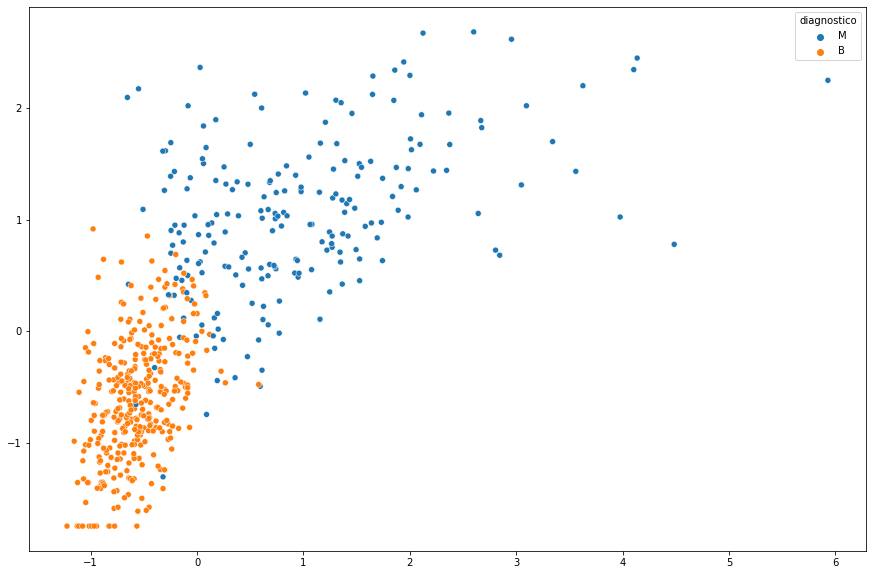

In [794]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.scatterplot(x=X_2d[:,0], y=X_2d[:,1], hue = y)

#### 7. Reduce Features-PCA, Visualization 2 dimmension

In [804]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_normalized_v4)
X_2d_v2 = pca.transform(X_normalized_v4)
X_2d_v2

array([[ 8.96150504,  1.20129074],
       [ 1.44812702, -3.54148885],
       [ 5.24751143, -1.46792042],
       ...,
       [ 0.87829285, -1.93369918],
       [10.0242535 ,  0.84654838],
       [-5.04091294, -0.5352433 ]])

<AxesSubplot: >

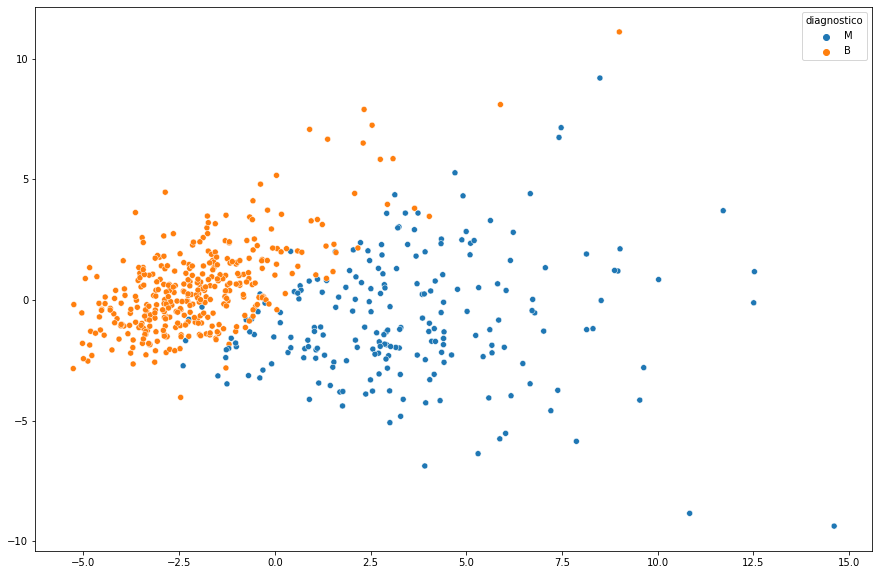

In [805]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.scatterplot(x=X_2d_v2[:,0], y=X_2d_v2[:,1], hue = y)

#### 8. Reduce Features-TSNE, Visualization 2 dimmension

In [810]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
#tsne.fit(X_normalized_v4)
X_2d_v3 = tsne.fit_transform(X_normalized_v4)
X_2d_v3

array([[ 31.202295 ,  -8.457996 ],
       [ 24.69066  ,   5.442135 ],
       [ 29.659353 ,  -4.8568435],
       ...,
       [ 18.251038 ,   7.4034815],
       [ 29.139912 ,  -9.205994 ],
       [-26.642267 ,   5.8702183]], dtype=float32)

<AxesSubplot: >

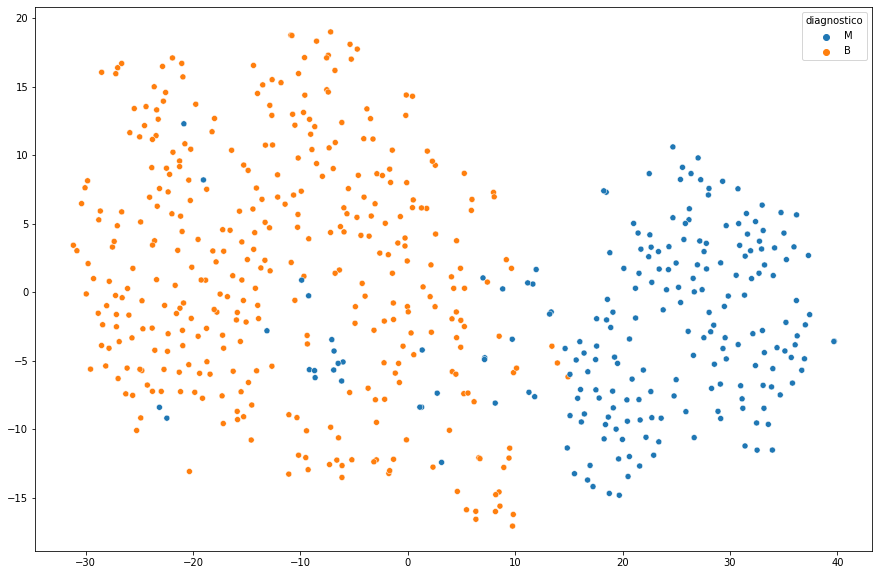

In [811]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.scatterplot(x=X_2d_v3[:,0], y=X_2d_v3[:,1], hue = y)